In [61]:
#!pip install gdown
#!pip install tensorflow-gpu

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
df=pd.read_csv('VAR-Dataset-P80-T1.csv')
df.head()

,Date,Utilization of Refinery in %,Production,Demand,Contract 1 FP,Global Sale (in millions),Last Day's Price,Price
0,12/23/2016,91.00,4516.180,4334.960,53.02,0.904921,53.020000,50.400000
1,12/27/2016,91.25,4514.068,4349.654,53.90,1.000438,53.460001,53.900002
2,12/28/2016,91.50,4511.956,4364.348,54.06,1.095955,53.900002,54.060001
3,12/29/2016,91.75,4509.844,4379.042,53.77,1.191472,54.060001,53.770000
4,12/30/2016,92.00,4507.732,4393.736,53.72,1.286989,53.770000,53.720001


In [64]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [65]:
# Data Understanding

In [66]:
df.shape

(1601, 7)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1601 entries, 2016-12-23 to 2022-11-09
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Utilization of Refinery in %  1601 non-null   float64
 1   Production                    1601 non-null   float64
 2   Demand                        1601 non-null   float64
 3   Contract 1 FP                 1601 non-null   float64
 4   Global Sale (in millions)     1601 non-null   float64
 5   Last Day's Price              1601 non-null   float64
 6   Price                         1601 non-null   float64
dtypes: float64(7)
memory usage: 100.1 KB


In [68]:
df.describe()

,Utilization of Refinery in %,Production,Demand,Contract 1 FP,Global Sale (in millions),Last Day's Price,Price
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,87.970050,4514.860057,4331.900456,56.779089,3.436772,56.803342,56.500968
std,6.739074,94.765287,112.982577,10.667006,1.461827,10.766204,10.714579
min,56.000000,4296.190000,4069.980000,31.130000,0.904921,35.790001,30.400000
25%,85.000000,4434.358103,4228.072984,48.860000,2.342632,48.750000,48.730000
50%,89.300000,4536.629091,4381.754071,56.540000,2.811135,56.549999,56.220001
75%,93.100000,4604.998893,4426.927549,65.050000,5.053707,64.900002,64.470001
max,98.100000,4619.320000,4455.850000,84.650000,5.600000,84.650002,84.650002


In [69]:
df.isnull().sum()

Utilization of Refinery in %    0
Production                      0
Demand                          0
Contract 1 FP                   0
Global Sale (in millions)       0
Last Day's Price                0
Price                           0
dtype: int64

In [70]:
df.head()

,Utilization of Refinery in %,Production,Demand,Contract 1 FP,Global Sale (in millions),Last Day's Price,Price
Date,,,,,,,
2016-12-23,91.00,4516.180,4334.960,53.02,0.904921,53.020000,50.400000
2016-12-27,91.25,4514.068,4349.654,53.90,1.000438,53.460001,53.900002
2016-12-28,91.50,4511.956,4364.348,54.06,1.095955,53.900002,54.060001
2016-12-29,91.75,4509.844,4379.042,53.77,1.191472,54.060001,53.770000
2016-12-30,92.00,4507.732,4393.736,53.72,1.286989,53.770000,53.720001


In [71]:
df.shape

(1601, 7)

In [72]:
# Data Visualization

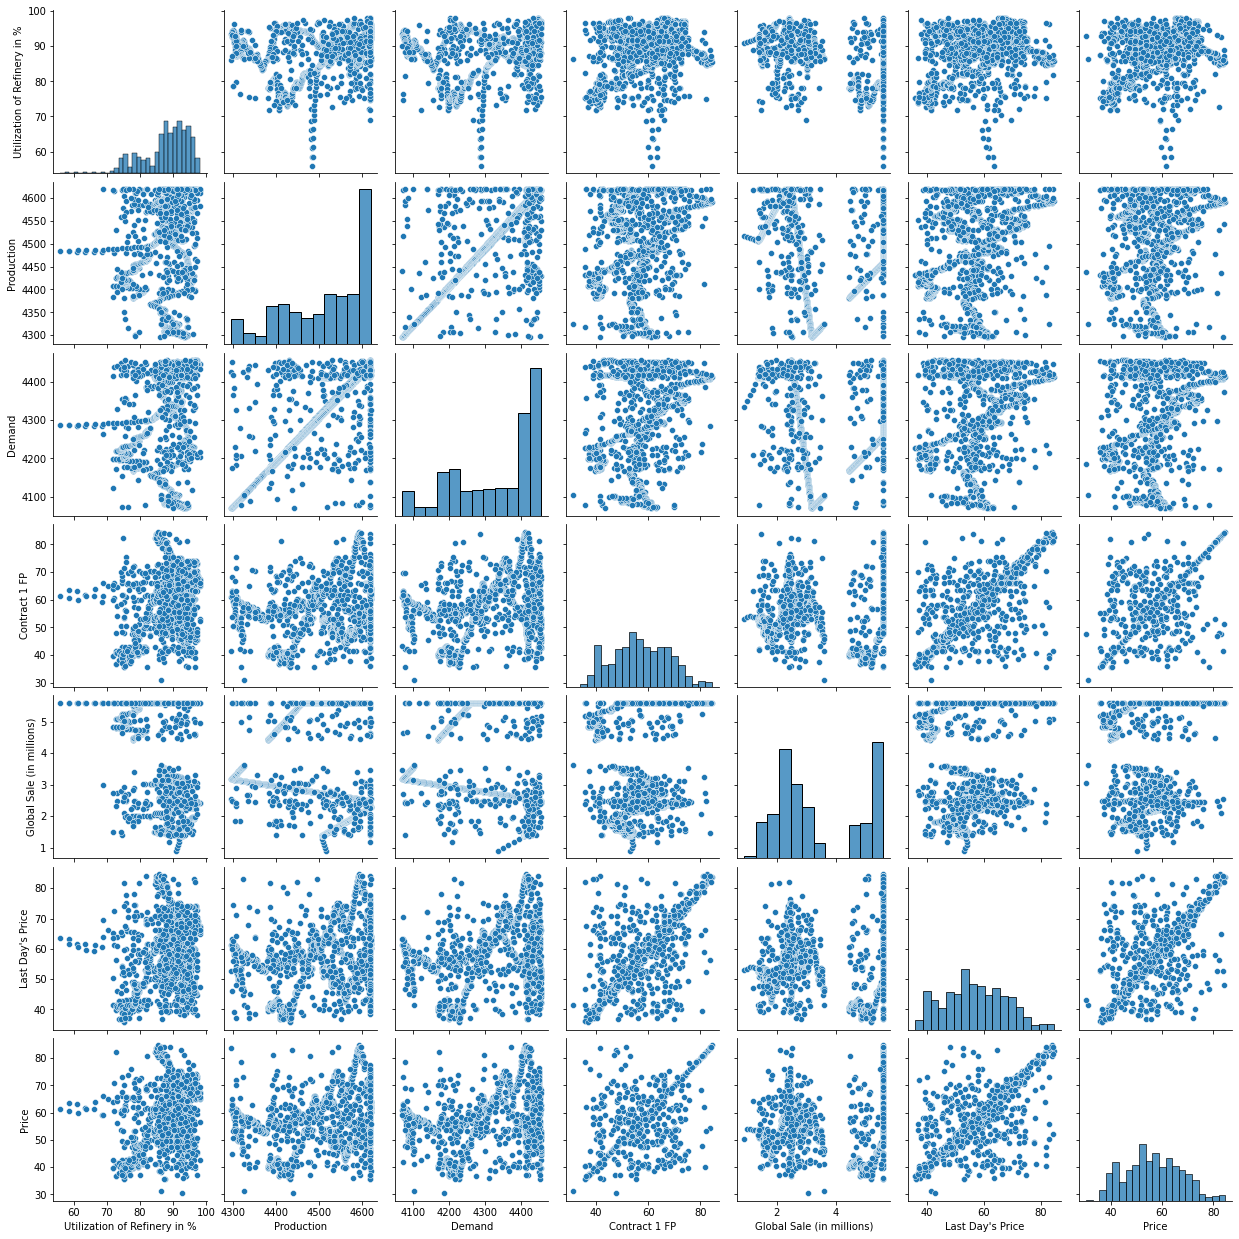

In [73]:
sns.pairplot(df)

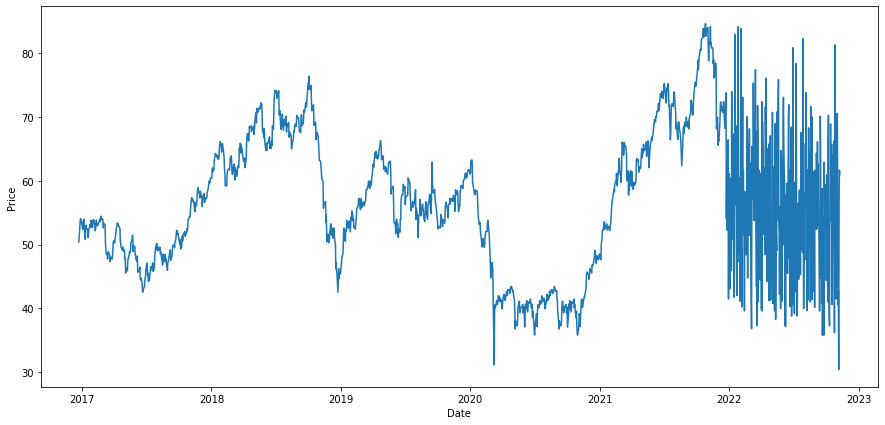

In [74]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df.index,y='Price',data=df)

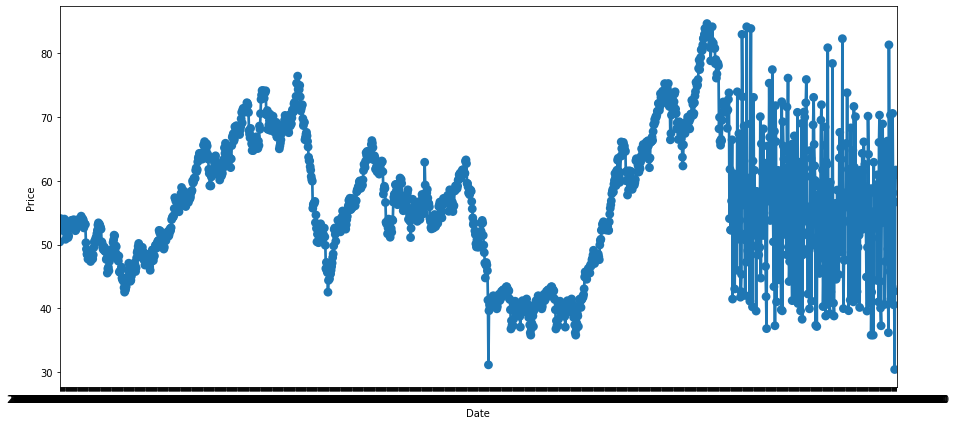

In [75]:
plt.figure(figsize=(15,7))
sns.pointplot(x=df.index,y=df.Price,data=df)

In [76]:
# Splitting Data

In [77]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1440 161


In [78]:
# Transforming Data

In [79]:
from sklearn.preprocessing import RobustScaler

f_columns = ['Utilization of Refinery in %', 'Production', 'Demand', 'Global Sale (in millions)','Contract 1 FP',"Last Day's Price"]

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Price']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Price'] = cnt_transformer.transform(train[['Price']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Price'] = cnt_transformer.transform(test[['Price']])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-79-8d7b2df20004>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [80]:
df.columns

Index(['Utilization of Refinery in %', 'Production', 'Demand', 'Contract 1 FP',
       'Global Sale (in millions)', 'Last Day's Price', 'Price'],
      dtype='object')

In [81]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [82]:
time_steps = 12

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Price, time_steps)
X_test, y_test = create_dataset(test, test.Price, time_steps)

print(X_train.shape, y_train.shape)

(1428, 12, 7) (1428,)


In [83]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [84]:
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(rate=0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [85]:
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
41/41 [==============================] - 4s 29ms/step - loss: 0.1624 - val_loss: 0.4672
Epoch 2/50
41/41 [==============================] - 1s 24ms/step - loss: 0.0607 - val_loss: 0.5477
Epoch 3/50
41/41 [==============================] - 1s 22ms/step - loss: 0.0524 - val_loss: 0.4584
Epoch 4/50
41/41 [==============================] - 1s 23ms/step - loss: 0.0691 - val_loss: 0.4741
Epoch 5/50
41/41 [==============================] - 1s 22ms/step - loss: 0.0981 - val_loss: 0.4649
Epoch 6/50
41/41 [==============================] - 1s 23ms/step - loss: 0.0340 - val_loss: 0.4654
Epoch 7/50
41/41 [==============================] - 1s 23ms/step - loss: 0.0341 - val_loss: 0.4777
Epoch 8/50
41/41 [==============================] - 1s 22ms/step - loss: 0.0321 - val_loss: 0.4611
Epoch 9/50
41/41 [==============================] - 1s 23ms/step - loss: 0.0252 - val_loss: 0.4695
Epoch 10/50
41/41 [==============================] - 1s 23ms/step - loss: 0.0173 - val_loss: 0.4676
Epoch 11/

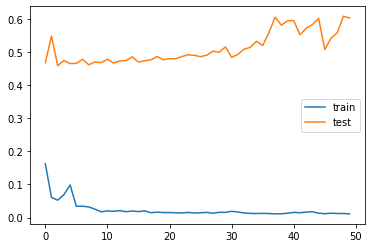

In [86]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [87]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [88]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

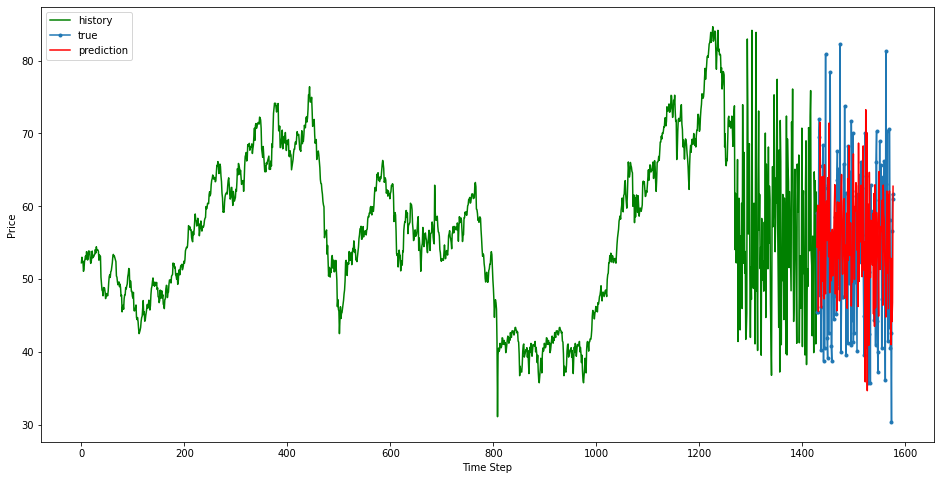

In [89]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

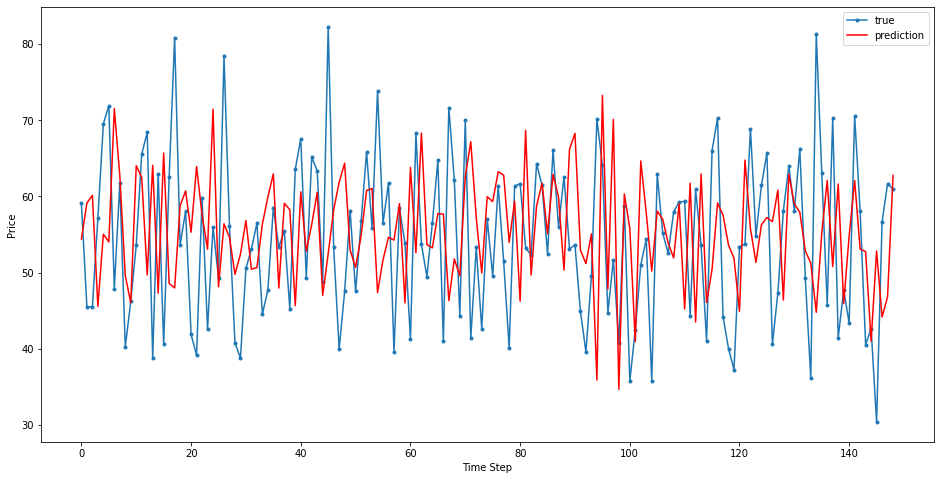

In [90]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_percentage_error,accuracy_score,mean_squared_error

In [92]:
mean_absolute_percentage_error(y_test,y_pred)

2.902780195937952

In [93]:
#print('RMSE: %.4f'% np.sqrt(sum((y_test)**2)/len(y_pred)))

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               69632     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [95]:
mean_squared_error(y_test,y_pred)

0.6550994742956425